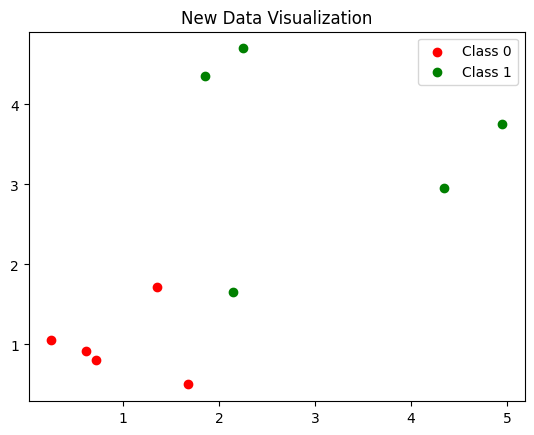

Epoch: 0, Error: 0.6513520179694359
Epoch: 50, Error: 0.46413736619694024
Epoch: 100, Error: 0.3611687799558446
Epoch: 150, Error: 0.2996223619283782
Epoch: 200, Error: 0.25989078931586873
Epoch: 250, Error: 0.23243176046327382
Epoch: 300, Error: 0.21235632890649203
Epoch: 350, Error: 0.19699560222410278
Final Weights: [0.9392978793625056, 1.0010921677877265, -3.360214351814366]
Output: 0.13, Target: 0
Output: 0.11, Target: 0
Output: 0.22, Target: 0
Output: 0.41, Target: 0
Output: 0.13, Target: 0
Output: 0.58, Target: 1
Output: 0.94, Target: 1
Output: 0.97, Target: 1
Output: 0.99, Target: 1
Output: 0.98, Target: 1
Accuracy: (10, 10)


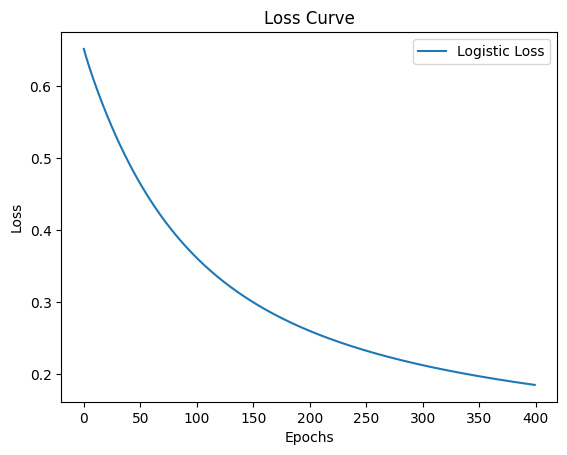

In [ ]:


import numpy as np
from random import randint
from matplotlib import pyplot as plt
from math import exp, log

# Новые данные
x1 = [0.72, 0.25, 1.68, 1.35, 0.61]
y1 = [0.81, 1.05, 0.50, 1.72, 0.92]
x2 = [2.15, 1.85, 2.25, 4.95, 4.35]
y2 = [1.65, 4.35, 4.70, 3.75, 2.95]

# Визуализация данных
plt.scatter(x=x1, y=y1, color='red', label='Class 0')
plt.scatter(x=x2, y=y2, color='green', label='Class 1')
plt.legend()
plt.title("New Data Visualization")
plt.show()

# Создание входных данных и меток
inputs = [(x1[i], y1[i]) for i in range(len(x1))]
targets = [0 for i in range(len(x1))]
inputs += [(x2[i], y2[i]) for i in range(len(x2))]
targets += [1 for i in range(len(x2))]

# Инициализация весов
weights = [randint(-100, 100) / 100 for _ in range(3)]

def weighted_z(point):
    z = [item * weights[i] for i, item in enumerate(point)]
    return sum(z) + weights[-1]

def logistic_function(z):
    return 1 / (1 + exp(-z))

def logistic_error():
    errors = []
    for i, point in enumerate(inputs):
        z = weighted_z(point)
        output = logistic_function(z)
        target = targets[i]

        if output == 1:
            output = 0.99999
        if output == 0:
            output = 0.00001

        error = -(target * log(output) + (1 - target) * log(1 - output))
        errors.append(error)
    return sum(errors) / len(errors)

# Learning rate и количество эпох
lr = 0.1
epochs = 400

# Обучение модели
losses = []
for epoch in range(epochs):
    for i, point in enumerate(inputs):
        z = weighted_z(point)
        output = logistic_function(z)
        target = targets[i]

        for j in range(len(weights) - 1):
            weights[j] -= lr * point[j] * (output - target) * (1 / len(inputs))

        weights[-1] -= lr * (output - target) * (1 / len(inputs))
    loss = logistic_error()
    losses.append(loss)
    if epoch % 50 == 0:  # Печать каждые 50 эпох
        print(f"Epoch: {epoch}, Error: {loss}")

# Финальные веса
print("Final Weights:", weights)

# Тестирование модели
def test():
    for i, point in enumerate(inputs):
        z = weighted_z(point)
        output = logistic_function(z)
        target = targets[i]
        print(f"Output: {round(output, 2)}, Target: {target}")

test()

# Точность модели
def accuracy():
    true_outputs = 0
    for i, point in enumerate(inputs):
        z = weighted_z(point)
        output = logistic_function(z)
        target = targets[i]
        if round(output) == target:
            true_outputs += 1
    return true_outputs, len(inputs)

print("Accuracy:", accuracy())

# График ошибки по эпохам
plt.plot(range(epochs), losses, label='Logistic Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

